<p align="center">
<img src="Images/sorbonne_logo.png" alt="Logo" width="300"/>
</p>

# **Module 2 - Statistics & Data Plotting**

* **Author**: Elia Landini
* **Student ID**: 12310239
* **Course**: EESM2-Financial Economics 
* **Supervisor**: XXXXXXXXXXXXXXXX
* **Reference Repository**: https://github.com/EliaLand/PVAR_japan_endogenous_money

### **1) REQUIREMENTS SET-UP**

In [349]:
# Requirements.txt file installation
# !pip install -r requirements.txt

In [350]:
# Libraries import
import warnings
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.filters.hp_filter import hpfilter
import sklearn.tree
import sklearn.metrics
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             accuracy_score, precision_recall_curve, auc, 
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px
import openpyxl as pxl
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Image
import itertools
from arch.unitroot import PhillipsPerron

### **2) DESCRIPTIVE STATISTICS**

In [351]:
# df import
jp_aggregated_df = pd.read_csv("Data/Aggregated/jp_aggregated_df.csv")
jp_aggregated_df

,Country,Time,Monetary Aggregates - M1 (JPY),Monetary Aggregates - M2 (JPY),Monetary Aggregates - M3 (JPY),Total Credit - Private Non-Financial (%GDP),Total Credit - General Government (%GDP),Total Credit - Households & NPISHs (%GDP),Total Treasury Reserves (- Gold),10-Year Gov Bond Yields (%),...,USD-JPY reer CPI-based (Index 2015=100),JPY-USD Spot Exchange Rate,HICP (NSA),Real GDP (billions chained 2015 JPY),Central Government Debt (% GDP),Domestic Private Debt Securities (% GDP),Domestic Public Debt Securities (% GDP),BoJ’s Total Assets (100 Million Yen),10-Year US T-Bills Yield (%),CBOE-VIX
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,5.980000e+02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,NaN,NaN,NaN,1.237223e+06,1.645,...,80.87212,147.8629,NaN,590141.1,NaN,NaN,NaN,6957819.0,4.120476,15.789091
898,JP,2025-10,NaN,NaN,NaN,NaN,NaN,NaN,1.238269e+06,1.655,...,79.34765,151.3545,NaN,NaN,NaN,NaN,NaN,6963487.0,4.061818,18.086522
899,JP,2025-11,NaN,NaN,NaN,NaN,NaN,NaN,1.245364e+06,1.805,...,77.74197,155.1411,NaN,NaN,NaN,NaN,NaN,6979490.0,4.093889,19.769500
900,JP,2025-12,NaN,NaN,NaN,NaN,NaN,NaN,1.252027e+06,2.060,...,76.74510,155.9150,NaN,NaN,NaN,NaN,NaN,6777762.0,4.143182,15.548182


In [352]:
# Metrics clusters for plotting
metrics_group = {
    "Monetary Aggregates" : ["Monetary Aggregates - M1 (JPY)", "Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)"],
    "Credit Metrics" : ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)", "Total Credit - Private Non-Financial (%GDP)"],
    "Reserves" : ["Total Treasury Reserves (- Gold)"],
    "Monetary Policy Proxies (Yields)" : ["10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)", "Est. 1-year Neutral Interest Rate (%)", "Est. 10-year Neutral Interest Rate (%)"], 
    "Exchange Rate" : ["USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate"],
    "Output-Trends": ["Real GDP (billions chained 2015 JPY)"],
    "Consumption Prices": ["HICP (NSA)"],
    "Debt Metrics" : ["Central Government Debt (% GDP)", "Domestic Private Debt Securities (% GDP)", "Domestic Public Debt Securities (% GDP)"],
    "Controls" : ["10-Year US T-Bills Yield (%)", "CBOE-VIX"],
    "BoJ Total Assets" : ["BoJ’s Total Assets (100 Million Yen)"]
}

In [353]:
# Descriptive statistics summary table - aggregate data
df = jp_aggregated_df.copy()
df.describe()

,Monetary Aggregates - M1 (JPY),Monetary Aggregates - M2 (JPY),Monetary Aggregates - M3 (JPY),Total Credit - Private Non-Financial (%GDP),Total Credit - General Government (%GDP),Total Credit - Households & NPISHs (%GDP),Total Treasury Reserves (- Gold),10-Year Gov Bond Yields (%),Call Money/Interbank Immediate (%),Est. 1-year Neutral Interest Rate (%),...,USD-JPY reer CPI-based (Index 2015=100),JPY-USD Spot Exchange Rate,HICP (NSA),Real GDP (billions chained 2015 JPY),Central Government Debt (% GDP),Domestic Private Debt Securities (% GDP),Domestic Public Debt Securities (% GDP),BoJ’s Total Assets (100 Million Yen),10-Year US T-Bills Yield (%),CBOE-VIX
count,7.670000e+02,7.460000e+02,5.270000e+02,729.000000,333.000000,729.000000,8.350000e+02,444.000000,486.000000,372.000000,...,672.000000,660.000000,664.000000,381.000000,385.000000,277.000000,277.000000,3.330000e+02,769.000000,433.000000
mean,2.799125e+14,3.659118e+14,9.357442e+14,163.508642,175.399099,54.214815,4.129945e+05,1.809365,1.248285,0.353968,...,124.607275,156.440462,85.737349,534964.846457,129.955192,61.365237,140.770820,3.216902e+06,5.821279,19.450670
std,2.845290e+14,3.038362e+14,3.323003e+14,27.939645,41.642344,15.385155,5.103086e+05,1.827134,2.187695,0.580089,...,30.967095,69.540097,19.359933,36455.066277,57.276103,8.777222,37.063681,2.509792e+06,2.939680,7.410614
min,4.021870e+12,3.564500e+12,2.952000e+14,110.800000,90.100000,19.900000,5.980000e+02,-0.280000,-0.071000,-0.420000,...,69.053920,76.643000,30.300000,461491.700000,38.176187,46.447950,63.163390,6.800640e+05,0.623636,10.125455
25%,5.802214e+13,4.820300e+13,7.623000e+14,139.100000,143.600000,44.100000,1.327976e+04,0.558500,0.001000,-0.260500,...,102.065650,108.442975,81.050000,503710.200000,80.478284,55.154430,111.204600,1.185414e+06,3.885714,14.083810
50%,1.518072e+14,3.102086e+14,9.926000e+14,162.100000,183.600000,61.000000,8.097288e+04,1.331500,0.089000,0.243500,...,117.916500,123.300700,95.100000,535176.400000,128.599668,59.193390,157.152800,1.499672e+06,5.461364,17.663333
75%,4.826217e+14,6.484915e+14,1.131859e+15,183.700000,211.500000,66.900000,9.822399e+05,1.942750,0.804680,0.864250,...,149.615975,209.364175,97.600000,567568.700000,192.112850,68.579800,176.609800,5.569180e+06,7.527273,22.944091
max,1.081546e+15,9.632187e+14,1.597004e+15,214.200000,237.700000,71.100000,1.371116e+06,8.032000,8.278130,1.380000,...,209.568500,358.020000,111.500000,593596.900000,216.135005,78.846620,217.026000,7.648115e+06,15.323810,62.668947


### **3) STATIONARITY TESTING**

In [354]:
# Autocorrelation coefficients AR(1)
# Drop non-numeric columns and rows with missing values
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# AR(1) autocorrelation for each variable
ar1_results = {}
for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# (!!!) lag-1 autocorrelation
    ar1 = series.autocorr(lag=1)
    ar1_results[col] = ar1

# Better to create a dataframe to display the results
jp_ar1_df = pd.DataFrame.from_dict(ar1_results, orient="index", columns=["AR(1)"])
jp_ar1_df

,AR(1)
Monetary Aggregates - M1 (JPY),0.999652
Monetary Aggregates - M2 (JPY),0.999929
Monetary Aggregates - M3 (JPY),0.999881
Total Credit - Private Non-Financial (%GDP),0.996948
Total Credit - General Government (%GDP),0.998994
Total Credit - Households & NPISHs (%GDP),0.996776
Total Treasury Reserves (- Gold),0.999310
10-Year Gov Bond Yields (%),0.972352
Call Money/Interbank Immediate (%),0.979437
Est. 1-year Neutral Interest Rate (%),0.998564


In [355]:
# Unit-root Testing - Adfuller Test 
# Drop non-numeric columns and handle missing data
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# (!!!) We need to initialize the results as empty list before execuding the test
results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# As before, we extract the AR(1) coefficients
    ar1 = series.autocorr(lag=1)

# Augmented Dickey-Fuller (ADF) unit root test 
    adf_result = adfuller(series, autolag="AIC")
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    crit_values = adf_result[4]

    results.append({
        "Variable": col,
        "AR(1)": ar1,
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Stationary - Absence of unit-root (HP1)": "Yes" if p_value < 0.05 else "No"
    })

jp_adf_df = pd.DataFrame(results)
jp_adf_df

,Variable,AR(1),ADF Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,Monetary Aggregates - M1 (JPY),0.999652,3.117286,1.000000,No
1,Monetary Aggregates - M2 (JPY),0.999929,3.305055,1.000000,No
2,Monetary Aggregates - M3 (JPY),0.999881,2.149086,0.998838,No
3,Total Credit - Private Non-Financial (%GDP),0.996948,-3.192805,0.020405,Yes
4,Total Credit - General Government (%GDP),0.998994,-0.577265,0.876037,No
5,Total Credit - Households & NPISHs (%GDP),0.996776,-1.360900,0.600871,No
6,Total Treasury Reserves (- Gold),0.999310,-1.874189,0.344299,No
7,10-Year Gov Bond Yields (%),0.972352,-0.569897,0.877640,No
8,Call Money/Interbank Immediate (%),0.979437,-2.879303,0.047808,Yes
9,Est. 1-year Neutral Interest Rate (%),0.998564,-0.844658,0.805651,No


In [356]:
# Unit-root Testing - Phillips-Perron Test 
# (!!!) We need to initialize the results as empty list before execuding the test
pp_results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col].dropna()
    
# Phillips–Perron test 
# (!!!) From arch instead of stats.models is much smoother
    test = PhillipsPerron(series)
    pp_results.append({
        "Variable": col,
        "PP Statistic": test.stat,
        "p-value": test.pvalue,
        "Stationary - Absence of unit-root (HP1)": "Yes" if test.pvalue < 0.05 else "No"
    })

jp_pp_df = pd.DataFrame(pp_results)
jp_pp_df

,Variable,PP Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,Monetary Aggregates - M1 (JPY),4.307842,1.000000,No
1,Monetary Aggregates - M2 (JPY),12.177731,1.000000,No
2,Monetary Aggregates - M3 (JPY),6.908406,1.000000,No
3,Total Credit - Private Non-Financial (%GDP),-2.943801,0.040487,Yes
4,Total Credit - General Government (%GDP),-0.995611,0.754862,No
5,Total Credit - Households & NPISHs (%GDP),-1.213293,0.667851,No
6,Total Treasury Reserves (- Gold),-1.826515,0.367379,No
7,10-Year Gov Bond Yields (%),-1.095043,0.717045,No
8,Call Money/Interbank Immediate (%),-2.817122,0.055869,No
9,Est. 1-year Neutral Interest Rate (%),-0.617292,0.867027,No


### **4) NON-STATIONARITY CORRECTIONS**

In [357]:
# Non-Stationarity Corrections - Log-Difference Transformations
# (!!!) Basically we need a detrending transformation for whole the variables as expected, given the undisputable presence of unit-root root and so non-sttaionarity
# (!!!) Autocorrelation is also evident, suggesting a marked time-dependent component, and so a trend, so we'll opt for both log transformations as well as first differences 
df = jp_aggregated_df.copy()
trans_df = df[["Country", "Time"]].copy()

# Transformations: 
# - Monetary Aggregates: I(1) nominal levels (levels non-stationary, but first-differences are I(0), stationary)
# - Reserves: I(1), level series of policy shocks 
# - Exchange Rate: Log-difference (returns)
# - Consumption Prices: Log-difference (inflation)
# - BoJ’s Total Assets: CA smoothing 
log_transformed_variables = ["Monetary Aggregates - M1 (JPY)", "Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)",
                             "Total Treasury Reserves (- Gold)",
                             "USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate",
                             "HICP (NSA)",
                             "BoJ’s Total Assets (100 Million Yen)"
                            ]

# Log-Difference Transformed Variables 
for var in log_transformed_variables:
    trans_df[f"LogDiff-{var}"] = np.log(df[f"{var}"]).diff()
trans_df


,Country,Time,LogDiff-Monetary Aggregates - M1 (JPY),LogDiff-Monetary Aggregates - M2 (JPY),LogDiff-Monetary Aggregates - M3 (JPY),LogDiff-Total Treasury Reserves (- Gold),LogDiff-USD-JPY reer CPI-based (Index 2015=100),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-HICP (NSA),LogDiff-BoJ’s Total Assets (100 Million Yen)
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,0.005091,-0.004843,0.002602,NaN,-0.039797
898,JP,2025-10,NaN,NaN,NaN,0.000845,-0.019030,0.023339,NaN,0.000814
899,JP,2025-11,NaN,NaN,NaN,0.005714,-0.020444,0.024710,NaN,0.002295
900,JP,2025-12,NaN,NaN,NaN,0.005336,-0.012906,0.004976,NaN,-0.029329


In [358]:
# Non-Stationarity Corrections - AR(1) detrending 
df = jp_aggregated_df.copy()
trans_df = trans_df.copy()

# Transformations: 
# - Credit Metrics: AR(1) detrending (cyclical credit gap), we want to remove the persistence of credit t-1, we can reduce this relatiosnship to:
# (!!!) c_t = α + ρc_t−1​ + ε_t, we take the residuals 
# (!!!) first differences are to aggresive for credit metrics, they destroy medium-term cycles, signal-to-noise
# (!!!) credit metrics tend to be highly-persistent I(0) and near-unit-root stationary (so it might result non-stationary, but it is actually slowly mean reverting, we want to keep cyclical deviations)
# - Monetary Policy Proxies: AR(1) detrending (policy shocks), rates are persistent but not truly I(1)
# - Debt Metrics: same reasoning as for credit 
# - VIX index
ar1detrend_transformed_variables = ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)", "Total Credit - Private Non-Financial (%GDP)",
                                    "10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)", "Est. 1-year Neutral Interest Rate (%)", "Est. 10-year Neutral Interest Rate (%)",
                                    "Central Government Debt (% GDP)", "Domestic Private Debt Securities (% GDP)", "Domestic Public Debt Securities (% GDP)",
                                    "10-Year US T-Bills Yield (%)", "CBOE-VIX"
                                   ]

# AR(1) detrending Transformed Variables 
for var in ar1detrend_transformed_variables:
# Lag-1 Reg
# (!!!) It triggers an errors as we don't specificy the model time index and frequency. It should be harmless, it only deactivates forecasting features.
    model = AutoReg(df[f"{var}"].dropna(), lags=1, old_names=False).fit()
# Residuals 
    trans_df[f"AR(1)detrend-{var}"] = df[f"{var}"] - model.fittedvalues
trans_df

d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use

,Country,Time,LogDiff-Monetary Aggregates - M1 (JPY),LogDiff-Monetary Aggregates - M2 (JPY),LogDiff-Monetary Aggregates - M3 (JPY),LogDiff-Total Treasury Reserves (- Gold),LogDiff-USD-JPY reer CPI-based (Index 2015=100),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-HICP (NSA),LogDiff-BoJ’s Total Assets (100 Million Yen),...,AR(1)detrend-Total Credit - Private Non-Financial (%GDP),AR(1)detrend-10-Year Gov Bond Yields (%),AR(1)detrend-Call Money/Interbank Immediate (%),AR(1)detrend-Est. 1-year Neutral Interest Rate (%),AR(1)detrend-Est. 10-year Neutral Interest Rate (%),AR(1)detrend-Central Government Debt (% GDP),AR(1)detrend-Domestic Private Debt Securities (% GDP),AR(1)detrend-Domestic Public Debt Securities (% GDP),AR(1)detrend-10-Year US T-Bills Yield (%),AR(1)detrend-CBOE-VIX
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,0.005091,-0.004843,0.002602,NaN,-0.039797,...,NaN,0.049781,0.005696,0.002627,0.002818,NaN,NaN,NaN,-0.151298,-0.505049
898,JP,2025-10,NaN,NaN,NaN,0.000845,-0.019030,0.023339,NaN,0.000814,...,NaN,0.015083,0.005696,0.014627,0.018818,NaN,NaN,NaN,-0.066308,1.759220
899,JP,2025-11,NaN,NaN,NaN,0.005714,-0.020444,0.024710,NaN,0.002295,...,NaN,0.155151,0.006696,0.002655,0.002863,NaN,NaN,NaN,0.024161,1.493216
900,JP,2025-12,NaN,NaN,NaN,0.005336,-0.012906,0.004976,NaN,-0.029329,...,NaN,0.261160,0.084704,0.002655,0.002863,NaN,NaN,NaN,0.041525,-4.155824


In [359]:
# Non-Stationarity Corrections - HP-filter cycle 
df = jp_aggregated_df.copy()
trans_df = trans_df.copy()

# Transformations: 
# - Output Trends: HP-filter cycle, trend smoothing
hpfilter_transformed_variables = ["Real GDP (billions chained 2015 JPY)"
                                 ]

# HP-filter cycle Transformed Variables 
for var in hpfilter_transformed_variables:    
    cycle, trend = hpfilter(
        np.log(df[f"{var}"]).dropna(),
        lamb=1600
    )
    trans_df[f"HPfilter-{var}"] = cycle
trans_df

,Country,Time,LogDiff-Monetary Aggregates - M1 (JPY),LogDiff-Monetary Aggregates - M2 (JPY),LogDiff-Monetary Aggregates - M3 (JPY),LogDiff-Total Treasury Reserves (- Gold),LogDiff-USD-JPY reer CPI-based (Index 2015=100),LogDiff-JPY-USD Spot Exchange Rate,LogDiff-HICP (NSA),LogDiff-BoJ’s Total Assets (100 Million Yen),...,AR(1)detrend-10-Year Gov Bond Yields (%),AR(1)detrend-Call Money/Interbank Immediate (%),AR(1)detrend-Est. 1-year Neutral Interest Rate (%),AR(1)detrend-Est. 10-year Neutral Interest Rate (%),AR(1)detrend-Central Government Debt (% GDP),AR(1)detrend-Domestic Private Debt Securities (% GDP),AR(1)detrend-Domestic Public Debt Securities (% GDP),AR(1)detrend-10-Year US T-Bills Yield (%),AR(1)detrend-CBOE-VIX,HPfilter-Real GDP (billions chained 2015 JPY)
0,JP,1950-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JP,1951-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JP,1951-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JP,1951-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JP,1951-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,JP,2025-09,NaN,NaN,NaN,0.005091,-0.004843,0.002602,NaN,-0.039797,...,0.049781,0.005696,0.002627,0.002818,NaN,NaN,NaN,-0.151298,-0.505049,-0.003512
898,JP,2025-10,NaN,NaN,NaN,0.000845,-0.019030,0.023339,NaN,0.000814,...,0.015083,0.005696,0.014627,0.018818,NaN,NaN,NaN,-0.066308,1.759220,NaN
899,JP,2025-11,NaN,NaN,NaN,0.005714,-0.020444,0.024710,NaN,0.002295,...,0.155151,0.006696,0.002655,0.002863,NaN,NaN,NaN,0.024161,1.493216,NaN
900,JP,2025-12,NaN,NaN,NaN,0.005336,-0.012906,0.004976,NaN,-0.029329,...,0.261160,0.084704,0.002655,0.002863,NaN,NaN,NaN,0.041525,-4.155824,NaN


In [360]:
# Transformed df to csv
jp_trans_df = trans_df.copy()
jp_trans_df.to_csv("Data/Transformed/jp_trans_df.csv", index=False)

### **5) TRANSFORMED VARIABLES STATIONARITY RE-TESTING**

In [361]:
# Autocorrelation coefficients AR(1)
# Drop non-numeric columns and rows with missing values
df = jp_trans_df.copy()
jp_transformed_numeric = df.drop(columns=["Country", "Time"]).dropna()

# AR(1) autocorrelation for each variable
ar1_results = {}
for col in jp_transformed_numeric.columns:
    series = jp_transformed_numeric[col]

# (!!!) lag-1 autocorrelation
    ar1 = series.autocorr(lag=1)
    ar1_results[col] = ar1

# Better to create a dataframe to display the results
jp_ar1_df = pd.DataFrame.from_dict(ar1_results, orient="index", columns=["AR(1)"])
jp_ar1_df

,AR(1)
LogDiff-Monetary Aggregates - M1 (JPY),0.501149
LogDiff-Monetary Aggregates - M2 (JPY),0.145687
LogDiff-Monetary Aggregates - M3 (JPY),0.436827
LogDiff-Total Treasury Reserves (- Gold),0.285308
LogDiff-USD-JPY reer CPI-based (Index 2015=100),0.280191
LogDiff-JPY-USD Spot Exchange Rate,0.276984
LogDiff-HICP (NSA),0.221841
LogDiff-BoJ’s Total Assets (100 Million Yen),-0.106853
AR(1)detrend-Total Credit - General Government (%GDP),-0.107352
AR(1)detrend-Total Credit - Households & NPISHs (%GDP),-0.020726


In [362]:
# Unit-root Testing - Adfuller Test 
# Drop non-numeric columns and handle missing data
df = jp_trans_df.copy()
jp_trans_numeric = df.drop(columns=["Country", "Time"]).dropna()

# (!!!) We need to initialize the results as empty list before execuding the test
results = []

for col in jp_trans_numeric.columns:
    series = jp_trans_numeric[col]

# As before, we extract the AR(1) coefficients
    ar1 = series.autocorr(lag=1)

# Augmented Dickey-Fuller (ADF) unit root test 
    adf_result = adfuller(series, autolag="AIC")
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    crit_values = adf_result[4]

    results.append({
        "Variable": col,
        "AR(1)": ar1,
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Stationary - Absence of unit-root (HP1)": "Yes" if p_value < 0.05 else "No"
    })

jp_adf_df = pd.DataFrame(results)
jp_adf_df

,Variable,AR(1),ADF Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,LogDiff-Monetary Aggregates - M1 (JPY),0.501149,-4.115769,9.120002e-04,Yes
1,LogDiff-Monetary Aggregates - M2 (JPY),0.145687,-3.560443,6.563902e-03,Yes
2,LogDiff-Monetary Aggregates - M3 (JPY),0.436827,-2.566731,1.000700e-01,No
3,LogDiff-Total Treasury Reserves (- Gold),0.285308,-3.105381,2.615749e-02,Yes
4,LogDiff-USD-JPY reer CPI-based (Index 2015=100),0.280191,-11.198618,2.273229e-20,Yes
5,LogDiff-JPY-USD Spot Exchange Rate,0.276984,-11.253500,1.689222e-20,Yes
6,LogDiff-HICP (NSA),0.221841,-2.804428,5.764403e-02,No
7,LogDiff-BoJ’s Total Assets (100 Million Yen),-0.106853,-2.337405,1.601876e-01,No
8,AR(1)detrend-Total Credit - General Government...,-0.107352,-2.681102,7.736584e-02,No
9,AR(1)detrend-Total Credit - Households & NPISH...,-0.020726,-5.608104,1.221036e-06,Yes


In [363]:
# Unit-root Testing - Phillips-Perron Test 
# (!!!) We need to initialize the results as empty list before execuding the test
pp_results = []

for col in jp_trans_numeric.columns:
    series = jp_trans_numeric[col].dropna()
    
# Phillips–Perron test 
# (!!!) From arch instead of stats.models is much smoother
    test = PhillipsPerron(series)
    pp_results.append({
        "Variable": col,
        "PP Statistic": test.stat,
        "p-value": test.pvalue,
        "Stationary - Absence of unit-root (HP1)": "Yes" if test.pvalue < 0.05 else "No"
    })

jp_pp_df = pd.DataFrame(pp_results)
jp_pp_df

,Variable,PP Statistic,p-value,Stationary - Absence of unit-root (HP1)
0,LogDiff-Monetary Aggregates - M1 (JPY),-10.297478,3.440904e-18,Yes
1,LogDiff-Monetary Aggregates - M2 (JPY),-14.515910,5.625589e-27,Yes
2,LogDiff-Monetary Aggregates - M3 (JPY),-12.279178,8.298620e-23,Yes
3,LogDiff-Total Treasury Reserves (- Gold),-12.939034,3.566905e-24,Yes
4,LogDiff-USD-JPY reer CPI-based (Index 2015=100),-11.000426,6.704001e-20,Yes
5,LogDiff-JPY-USD Spot Exchange Rate,-11.252828,1.695361e-20,Yes
6,LogDiff-HICP (NSA),-11.651994,2.026902e-21,Yes
7,LogDiff-BoJ’s Total Assets (100 Million Yen),-16.644425,1.624131e-29,Yes
8,AR(1)detrend-Total Credit - General Government...,-16.711166,1.434194e-29,Yes
9,AR(1)detrend-Total Credit - Households & NPISH...,-15.731790,1.286772e-28,Yes


### **6) BASE DATA PLOTTING**

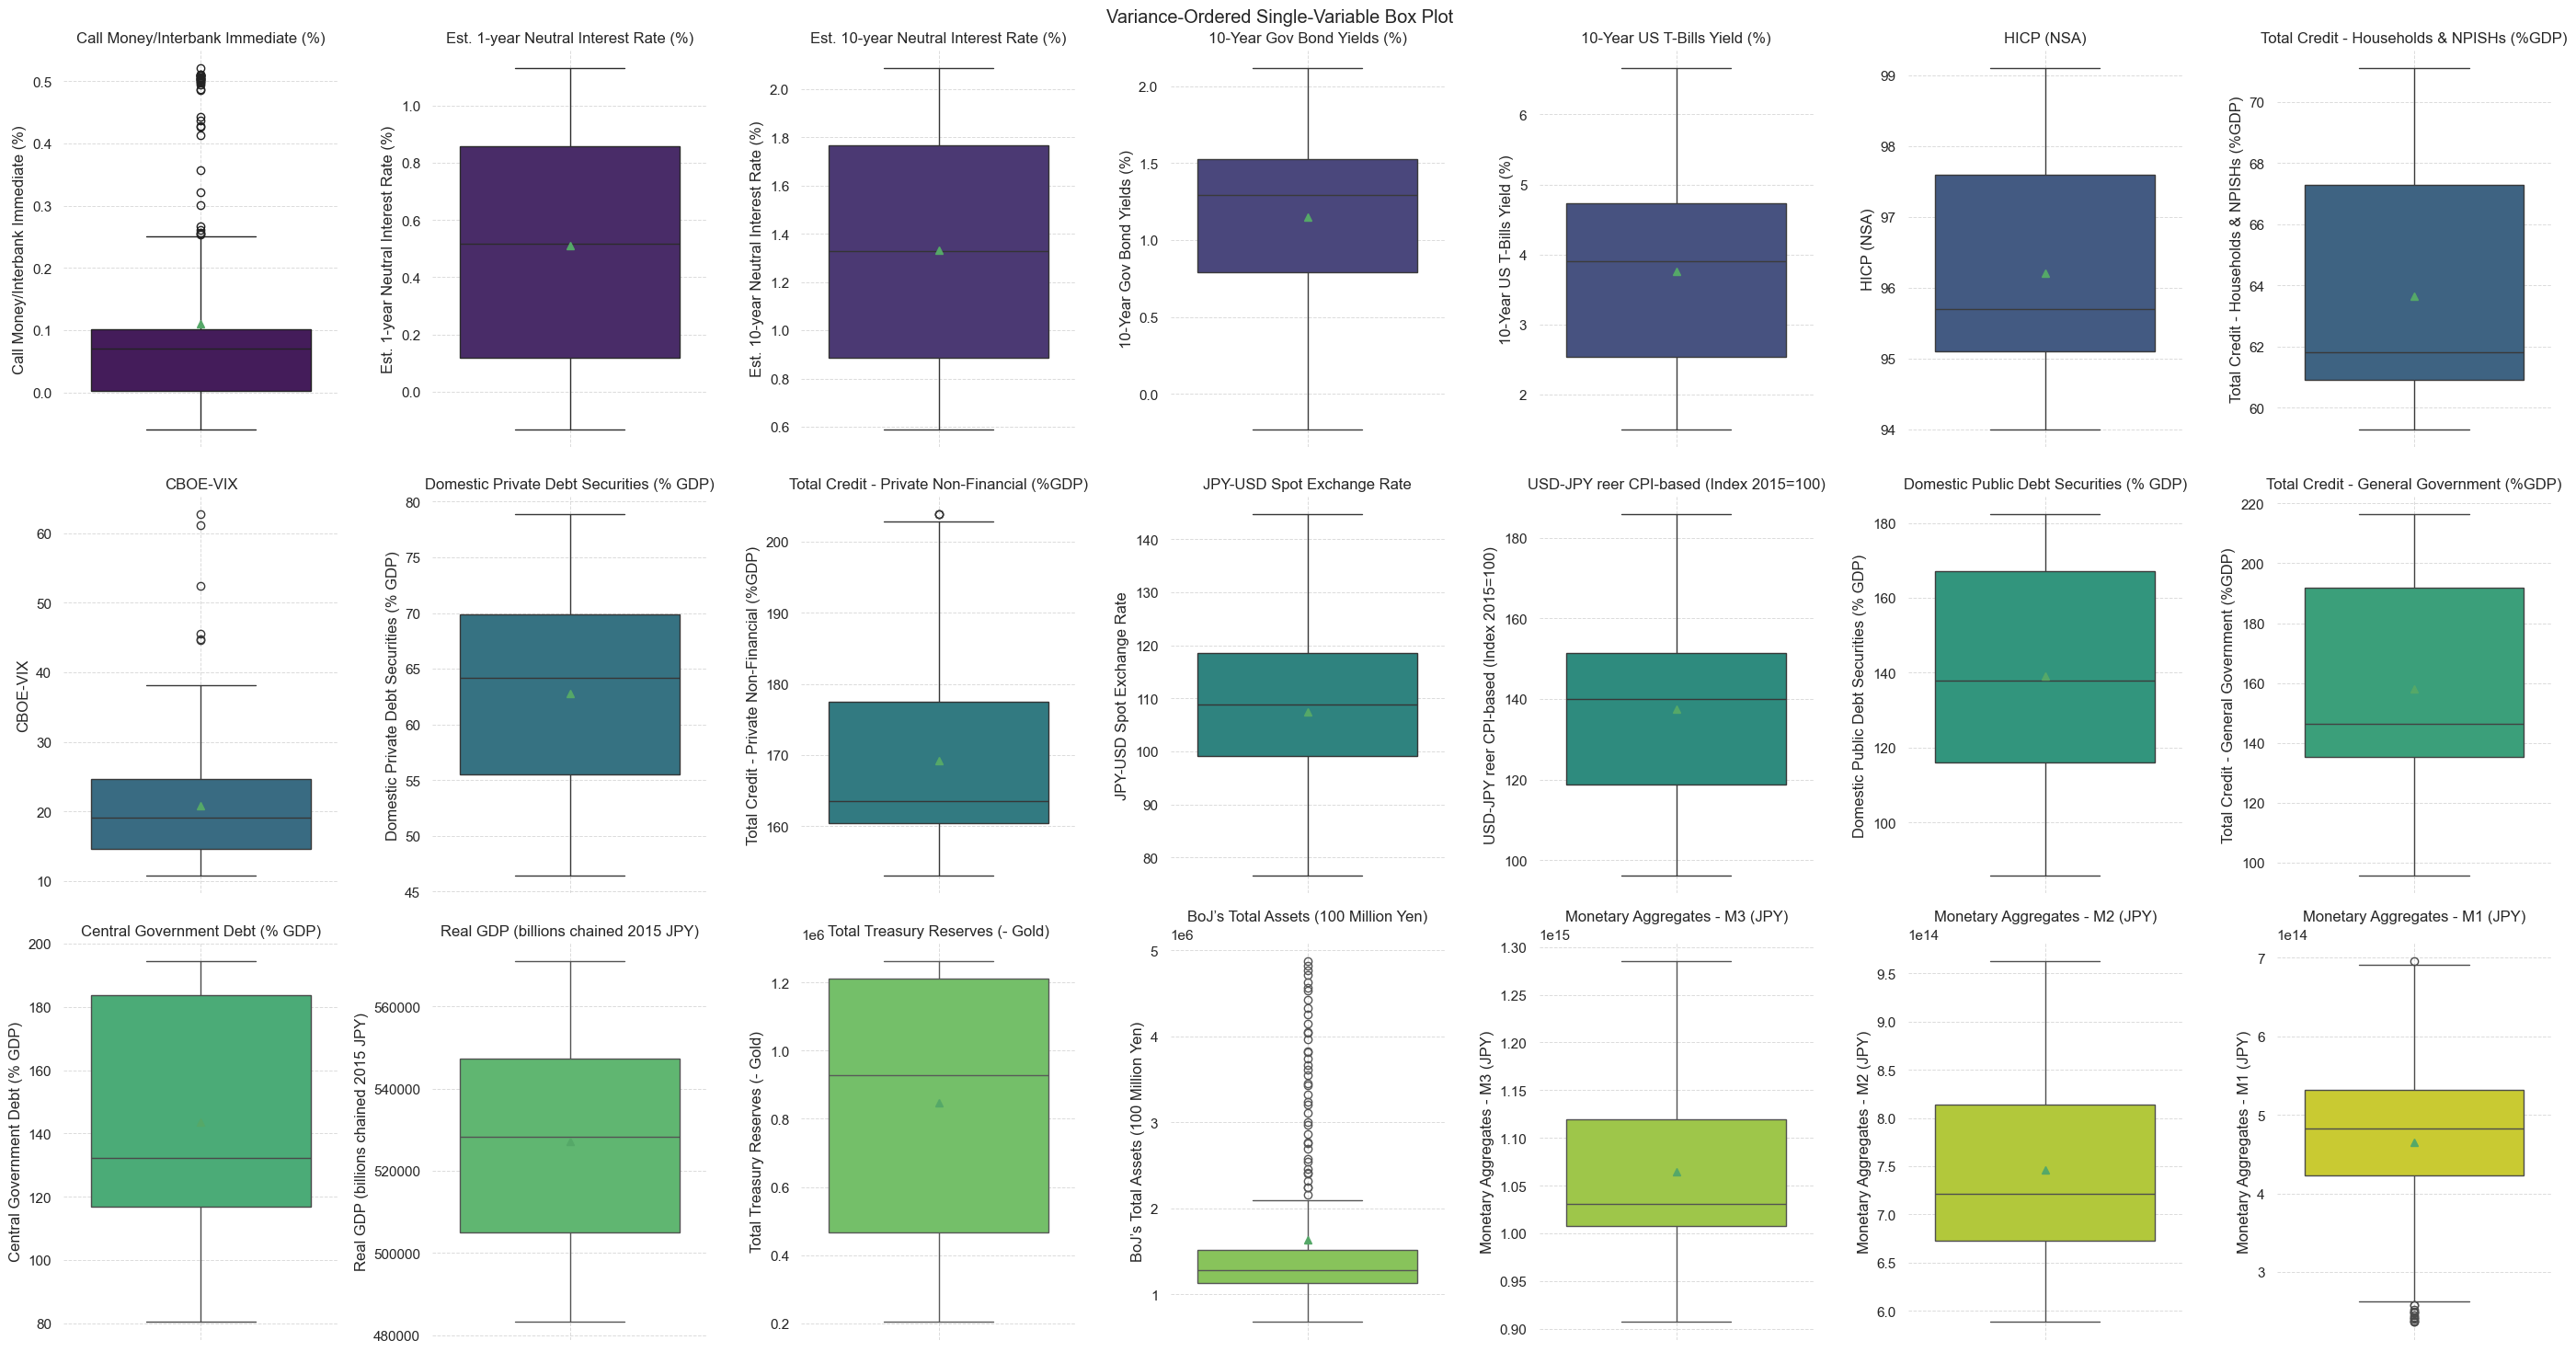

In [364]:
# Data Plotting (box-plot)

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
rows = int(np.ceil(len(X) / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 5 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.boxplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i],        
        showmeans=True
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

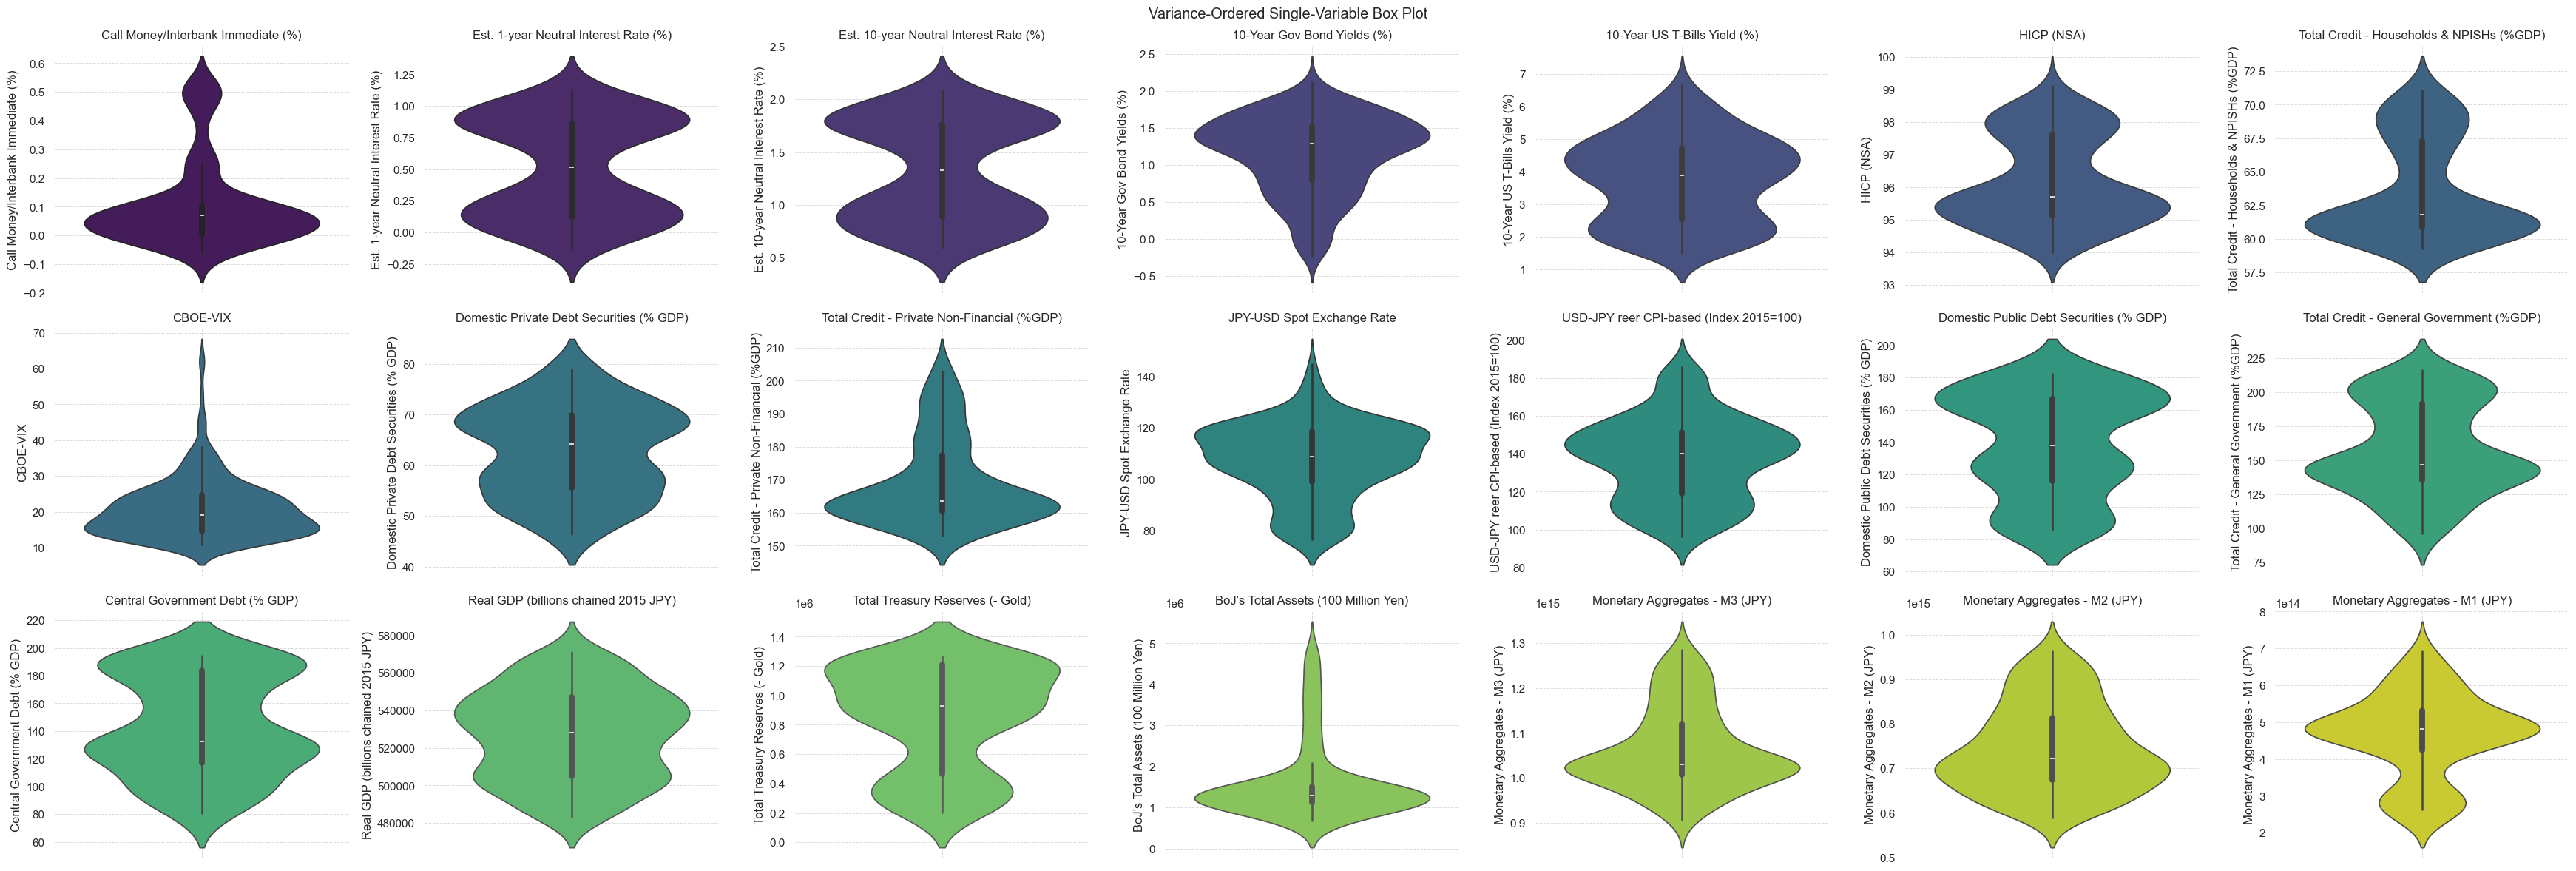

In [365]:
# Data Plotting (violin-plot)
# Same code as box-plots

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
rows = int(np.ceil(len(X) / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.violinplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i]
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

C:\Users\eland\AppData\Local\Temp\ipykernel_15692\1872954939.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


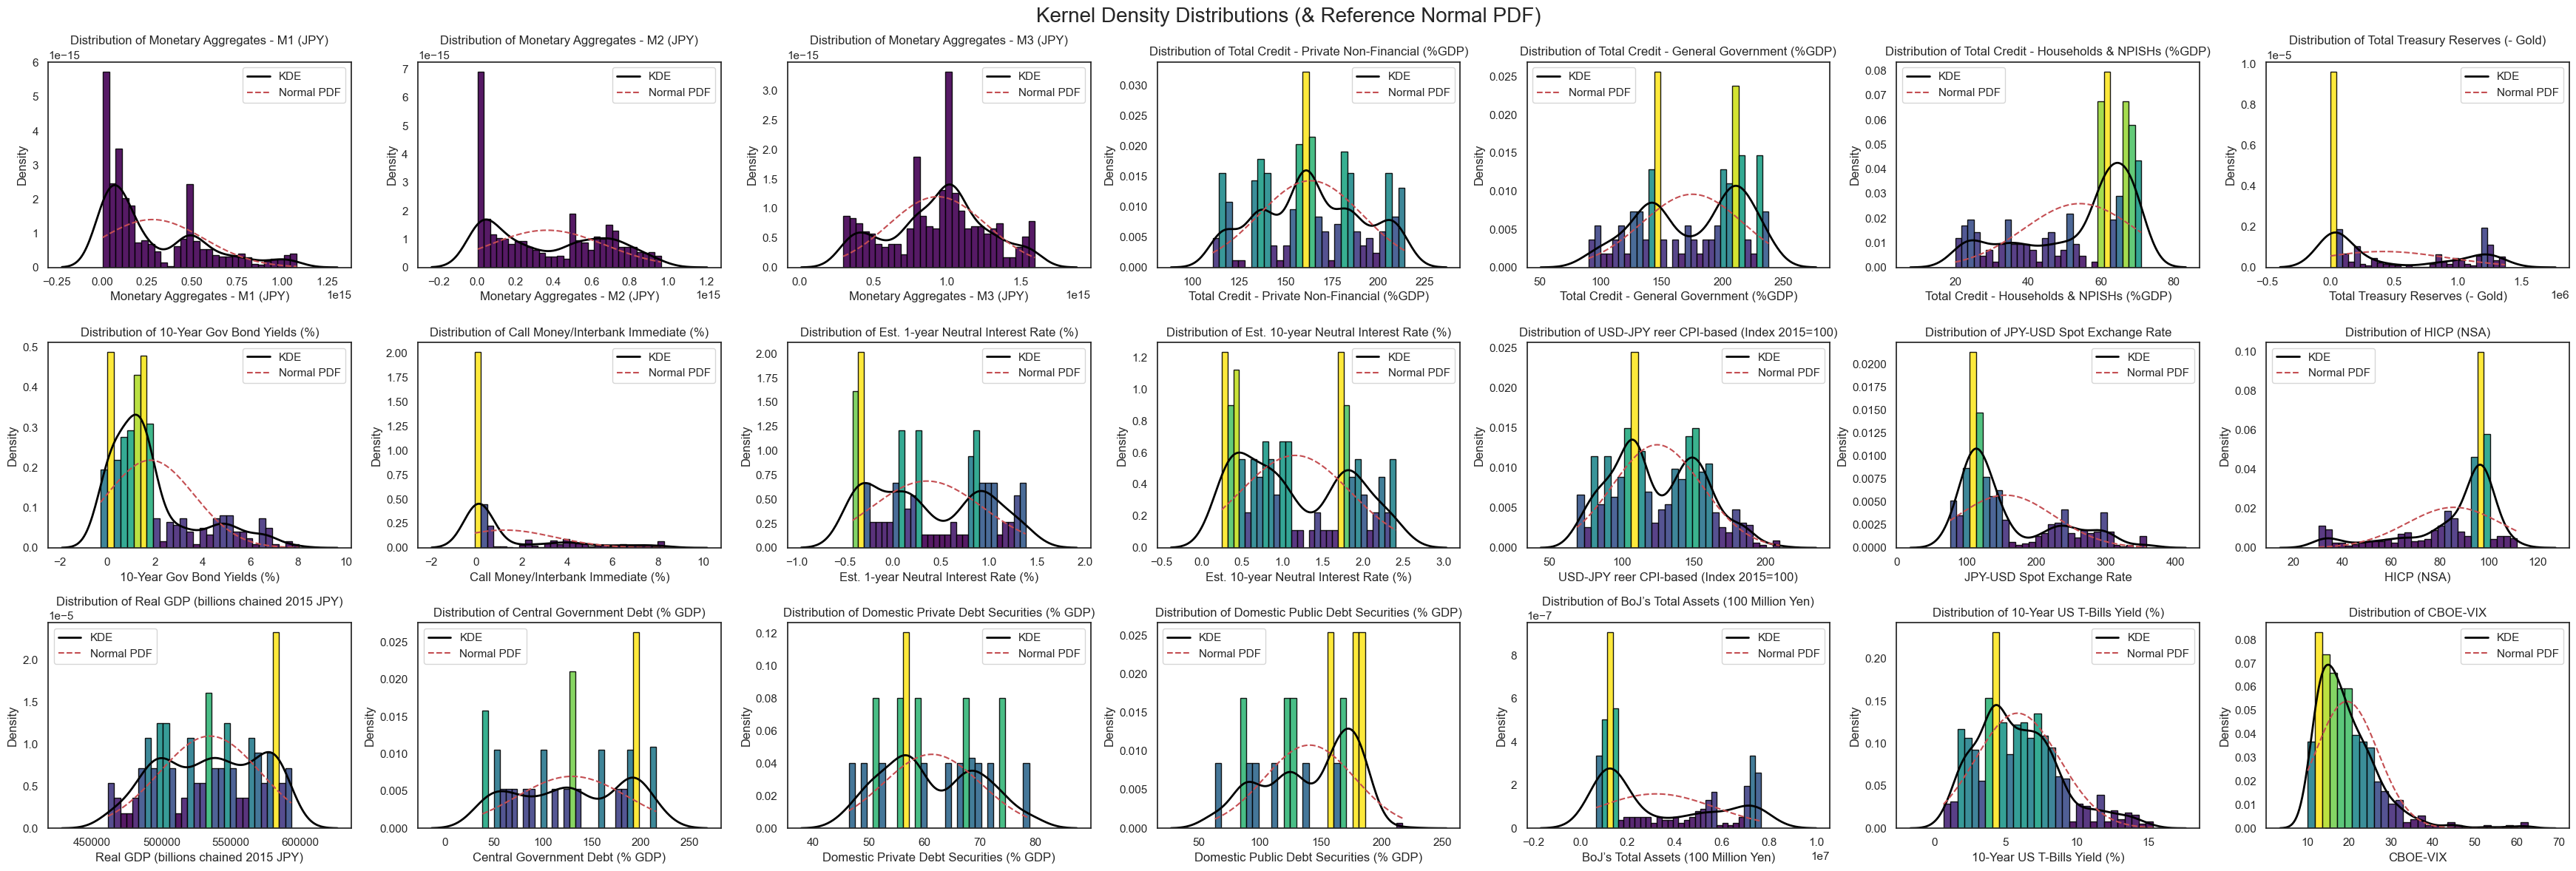

In [366]:
# Data Plotting (variable distribution with respect to the theoretical normal)
# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
jp_aggregated_kde = jp_aggregated_df.drop(columns=["Country", "Time"])
num_vars = jp_aggregated_kde.shape[1]
rows = int(np.ceil(num_vars / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.ravel(axes)

# Colormap
cmap = cm.get_cmap("viridis")

# Iteration per each variable in jp_aggregated_df (var_i=location of the variable based on index, col_name = variable name)
for i, col in enumerate(jp_aggregated_kde.columns):
    data = jp_aggregated_kde[col].dropna()
# Kernel density distribution of i
# We discard the NaN observations we mentioned earlier
    counts, bins = np.histogram(data, bins=30, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    widths = np.diff(bins)
# Normalized densities for color mapping
    vmin, vmax = counts.min(), counts.max()
    if np.isclose(vmin, vmax):
        colors = cmap(np.zeros_like(counts))
    else:
        norm_cmap = Normalize(vmin=vmin, vmax=vmax)
        colors = cmap(norm_cmap(counts))
# Bins definition
    axes[i].bar(bin_centers, counts, width=widths, color=colors, edgecolor="black", alpha=0.9)
# KDE
    sns.kdeplot(data, ax=axes[i], color="black", linewidth=2, label="KDE")
# Normal PDF
    mu, std = data.mean(), data.std(ddof=1)
    x = np.linspace(bins.min(), bins.max(), 200)
    axes[i].plot(x, norm.pdf(x, mu, std), "r--", label="Normal PDF")

    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()
# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Kernel Density Distributions (& Reference Normal PDF)", fontsize=20)
plt.tight_layout()
plt.show()

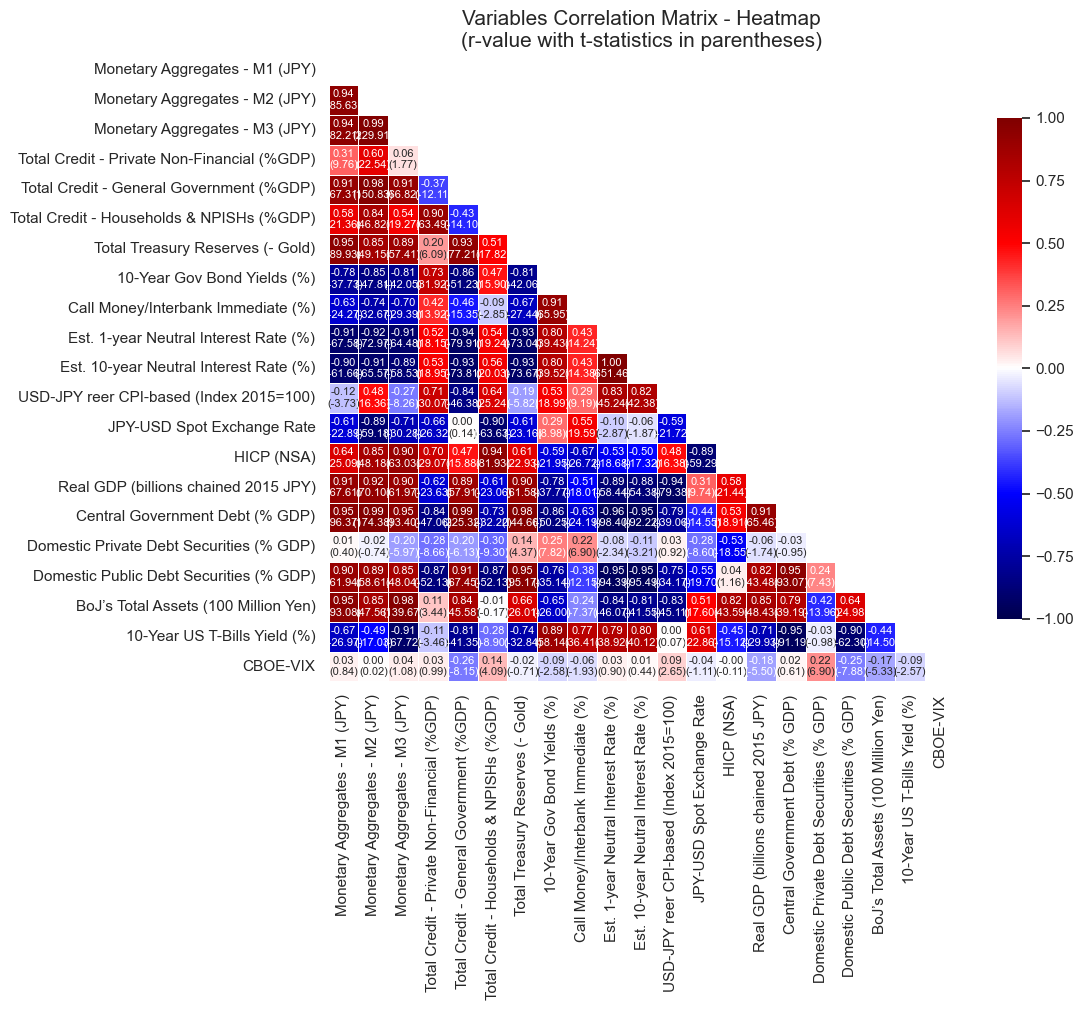

In [367]:
# Data Plotting (Correlation Heatmap)

# Keep only numeric columns
Xy = [col for col in jp_aggregated_df.columns if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_aggregated_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

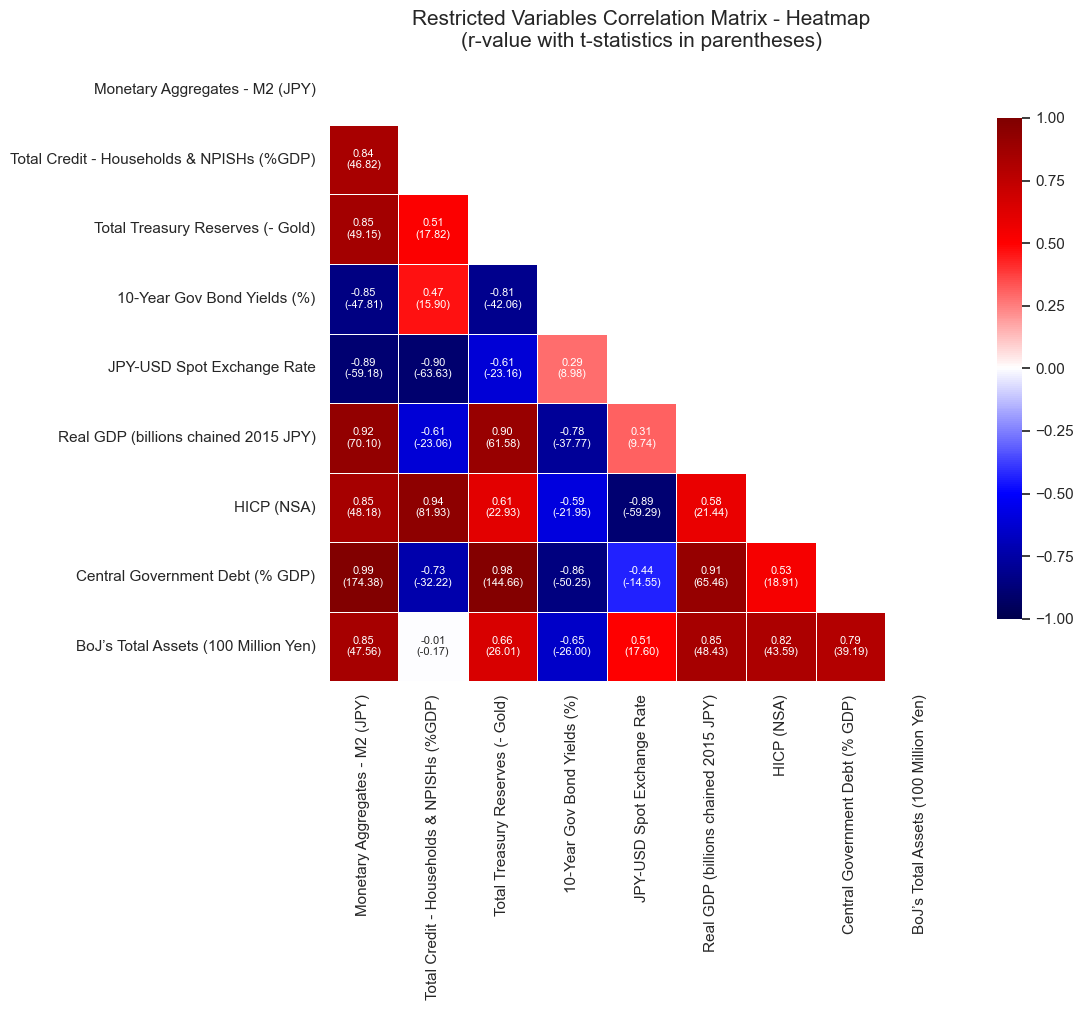

In [368]:
# Data Plotting (Reduced Correlation Heatmap)
# (!!!) We only target representative variables for each metrics group for better visualization 

# Keep only numeric columns
Xy = [col for col in jp_aggregated_df[["Monetary Aggregates - M2 (JPY)",
                                       "Total Credit - Households & NPISHs (%GDP)",
                                       "Total Treasury Reserves (- Gold)",
                                       "10-Year Gov Bond Yields (%)",
                                       "JPY-USD Spot Exchange Rate",
                                       "Real GDP (billions chained 2015 JPY)",
                                       "HICP (NSA)",
                                       "Central Government Debt (% GDP)",
                                       "BoJ’s Total Assets (100 Million Yen)"
                                       ]].columns if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_aggregated_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Restricted Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

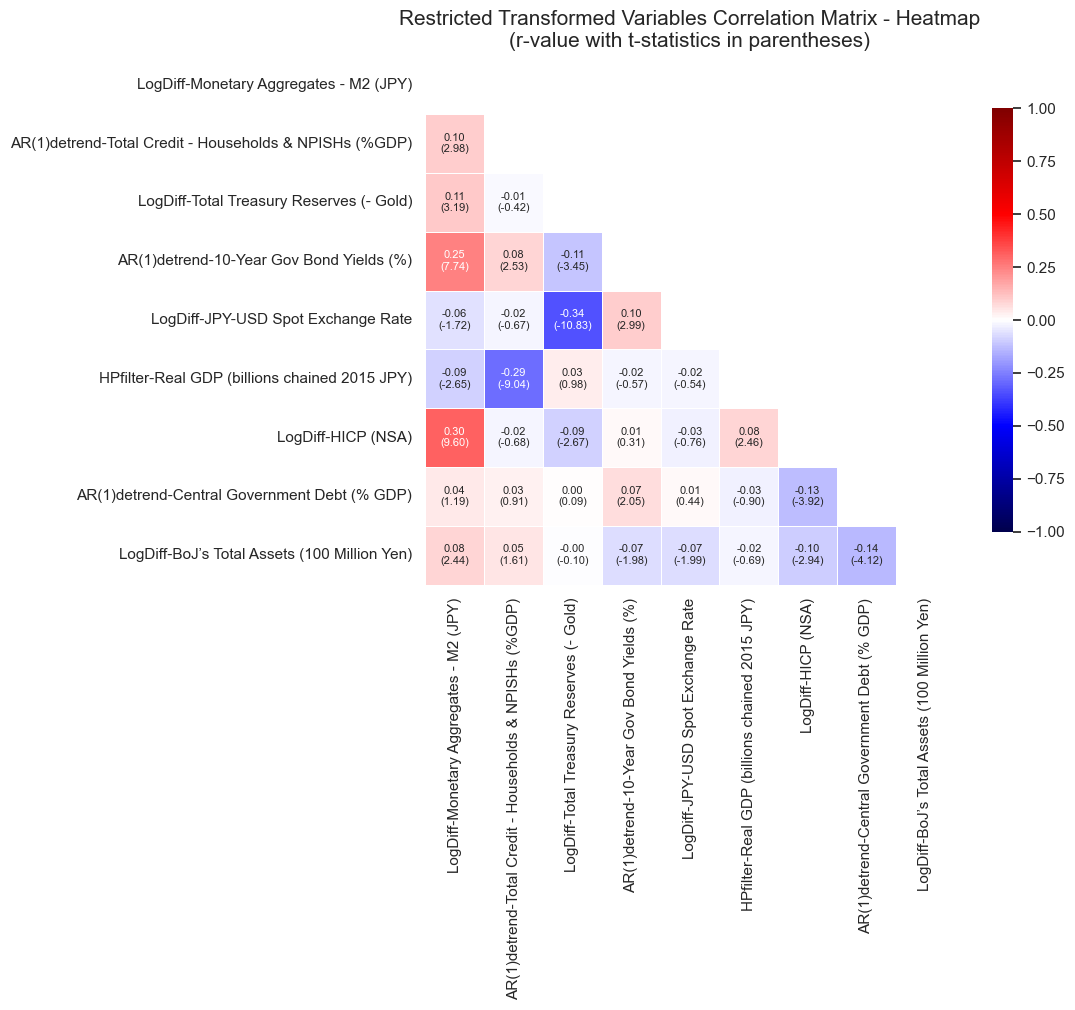

In [369]:
# Data Plotting (Reduced Transformed Variables Correlation Heatmap)
# (!!!) We only target representative variables for each metrics group for better visualization 
# (!!!) Quite good, cuz we managed to remove common trends, mechanical persistence, scale effects

# Keep only numeric columns
Xy = [col for col in jp_trans_df[["LogDiff-Monetary Aggregates - M2 (JPY)",
                                  "AR(1)detrend-Total Credit - Households & NPISHs (%GDP)",
                                  "LogDiff-Total Treasury Reserves (- Gold)",
                                  "AR(1)detrend-10-Year Gov Bond Yields (%)",
                                  "LogDiff-JPY-USD Spot Exchange Rate",
                                  "HPfilter-Real GDP (billions chained 2015 JPY)",
                                  "LogDiff-HICP (NSA)",
                                  "AR(1)detrend-Central Government Debt (% GDP)",
                                  "LogDiff-BoJ’s Total Assets (100 Million Yen)"
                                ]].columns if pd.api.types.is_numeric_dtype(jp_trans_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_trans_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Restricted Transformed Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

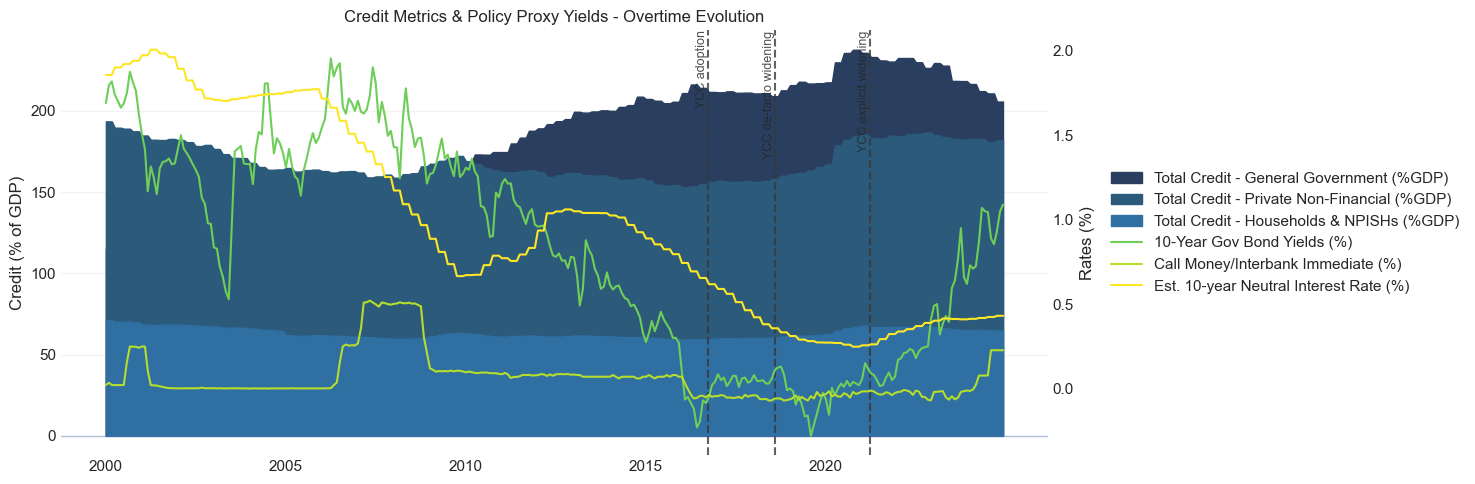

In [379]:
# Overtime Plotting - Credit Metrics & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics 
credit_metrics = ["Total Credit - General Government (%GDP)", 
                  "Total Credit - Private Non-Financial (%GDP)", 
                  "Total Credit - Households & NPISHs (%GDP)"
                  ]
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.sort_values("Time").set_index("Time")
df = df.loc[df.index.year >= 2000]
df = df.loc[df.index.year <= 2024]
plot_cols = credit_metrics + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Palette
credit_colors = [
    "#2a3f5f",  
    "#2c5a7b",  
    "#2f6fa2"   
]
# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Credit Metrics (Axis 1)
for i, col in enumerate(credit_metrics):
    s = df[col]
    ax1.fill_between(s.index, 0, s, color=credit_colors[i], alpha=1.0, label=col)
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
ax1.set_ylabel("Credit (% of GDP)")
ax1.axhline(0, lw=1, alpha=0.4)

# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Cosmetics 
for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="upper left",
    bbox_to_anchor=(1.05, 0.7),
    frameon=False,
)
ax1.set_title("Credit Metrics & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

C:\Users\eland\AppData\Local\Temp\ipykernel_15692\2829999464.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  debt_y = df[debt_metrics].resample("Y").mean()
C:\Users\eland\AppData\Local\Temp\ipykernel_15692\2829999464.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  central_y = df[central_debt].resample("Y").mean()


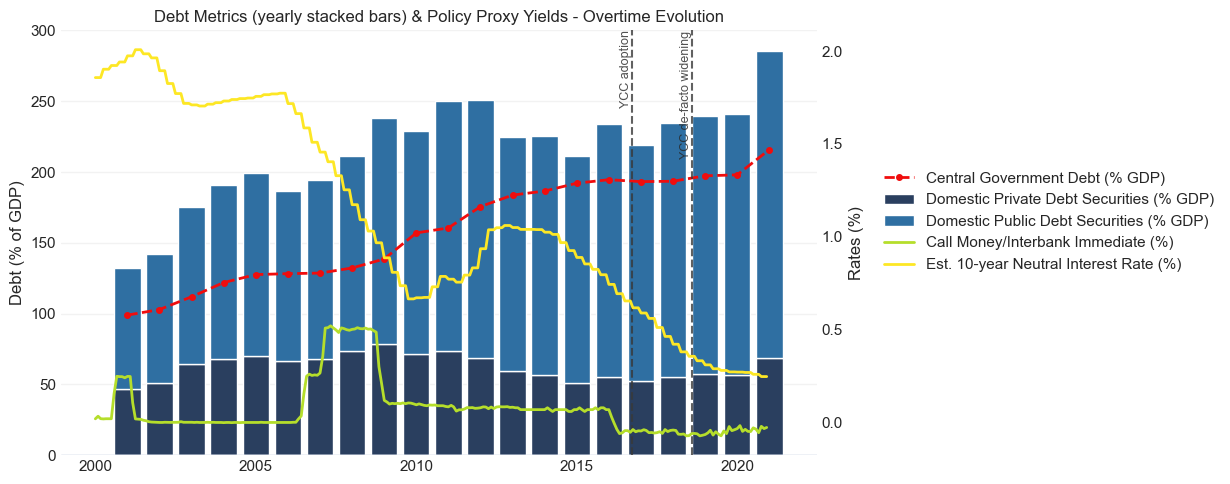

In [378]:
# Overtime Plotting - Debt Metrics & Yield Metrics
df = jp_aggregated_df.copy()

debt_metrics = [
    "Domestic Private Debt Securities (% GDP)", 
    "Domestic Public Debt Securities (% GDP)"
]
central_debt = "Central Government Debt (% GDP)"
yield_metrics = [
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 2000) & (df.index.year <= 2020)]
plot_cols = debt_metrics + [central_debt] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")
# From monthly to yearly bins (year average + stacking) for debt metrics
debt_y = df[debt_metrics].resample("Y").mean()
central_y = df[central_debt].resample("Y").mean()
# (!!!) We keep monthly for yields
yields_m = df[yield_metrics]

# Color Palette
debt_colors = [
    "#2a3f5f",  
    "#2f6fa2"   
]
yield_colors  = ["#b5de2b", "#fde725"]

# General Layout and Settings
fig, ax1 = plt.subplots(figsize=(15, 5))
xq = debt_y.index
bar_width_days = 300
pos_bottom = np.zeros(len(debt_y))
neg_bottom = np.zeros(len(debt_y))

# Stacked Histogram with individual debt metrics for public and private debt
# (!!!) Central government debt is plot as separate line 
for i, col in enumerate(debt_metrics):
    y = debt_y[col].to_numpy(dtype=float)
    y = np.nan_to_num(y, nan=0.0)
    y_pos = np.where(y > 0, y, 0.0)
    y_neg = np.where(y < 0, y, 0.0)
    ax1.bar(xq, y_pos, bottom=pos_bottom, width=bar_width_days,
            color=debt_colors[i], alpha=1.0, label=col, align="center")
    ax1.bar(xq, y_neg, bottom=neg_bottom, width=bar_width_days,
            color=debt_colors[i], alpha=1.0, label="_nolegend_", align="center")
    pos_bottom += y_pos
    neg_bottom += y_neg

ax1.plot(
    central_y.index, central_y.values,
    color="#f00d0d", lw=2, ls="--",
    marker="o", markersize=4,
    label=central_debt, zorder=5
)
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
ax1.set_ylabel("Debt (% of GDP)")
ax1.axhline(0, lw=1, alpha=0.4)

# Yields Lines
ax2 = ax1.twinx()
xm = yields_m.index
for col, c in zip(yield_metrics, yield_colors):
    ax2.plot(xm, yields_m[col], lw=2, ls="-", color=c, label=col)
ax2.set_ylabel("Rates (%)")

# Cosmetics
for ax in (ax1, ax2):
    for side in ("top", "right", "left", "bottom"):
        ax.spines[side].set_visible(False)
    ax.tick_params(axis="both", length=0)
years = df.index.year
unique_years = sorted(set(years))
step = 5
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)
ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="upper left",
    bbox_to_anchor=(1.07, 0.7),
    frameon=False,
)
ax1.set_title("Debt Metrics (yearly stacked bars) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

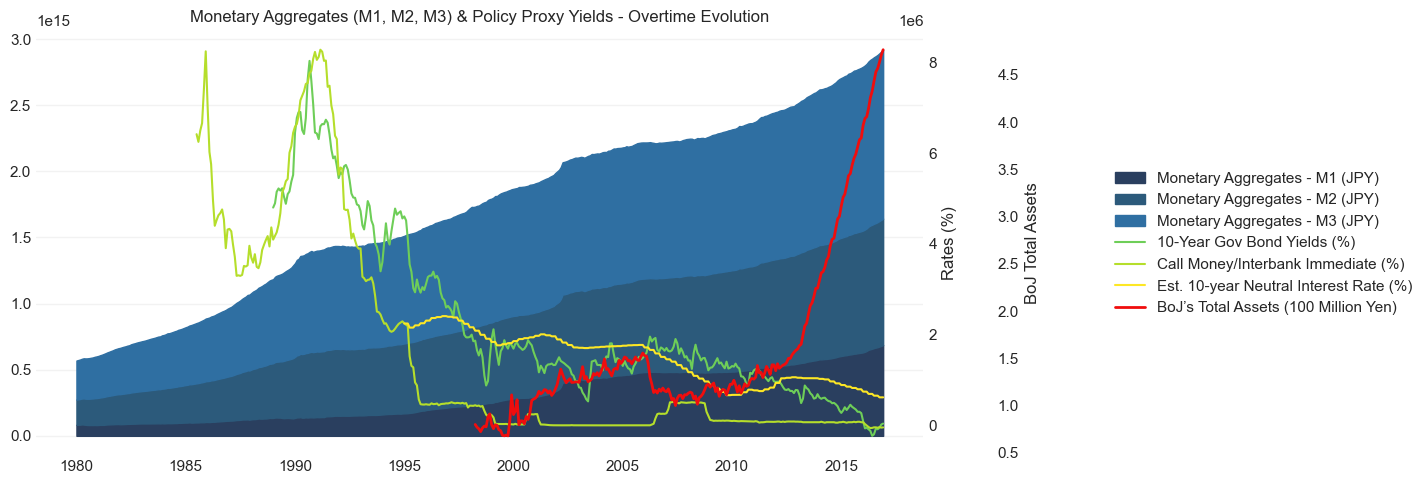

In [372]:
# Overtime Plotting - Monetary Aggregates & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics 
monetary_aggregates = ["Monetary Aggregates - M1 (JPY)", 
                       "Monetary Aggregates - M2 (JPY)", 
                       "Monetary Aggregates - M3 (JPY)"
                      ]
boj_ta = "BoJ’s Total Assets (100 Million Yen)"
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 1980) & (df.index.year < 2017)]
plot_cols = monetary_aggregates + [boj_ta] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Color Palette
monetary_colors = [
    "#2a3f5f",  
    "#2c5a7b",  
    "#2f6fa2"
]

# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Monetary Aggregates (Axis 1)
cum = np.zeros(len(df))
for i, col in enumerate(monetary_aggregates):
    s = df[col].to_numpy(dtype=float)
    s = np.nan_to_num(s, nan=0.0)
    ax1.fill_between(
        df.index,
        cum,
        cum + s,
        color=monetary_colors[i],
        alpha=1.0,
        label=col
    )
    cum += s
# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Line Plotting for BoJ Total Assets (Axis 3)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(
    df.index,
    df[boj_ta],
    color="#f00d0d",
    lw=2,
    ls="-",
    label=boj_ta,
    zorder=6
)
ax3.set_ylabel("BoJ Total Assets")

# Cosmetics 
for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(
    h1 + h2 + h3,
    l1 + l2 + l3,
    loc="upper left",
    bbox_to_anchor=(1.2, 0.7),
    frameon=False,
)
ax1.set_title("Monetary Aggregates (M1, M2, M3) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

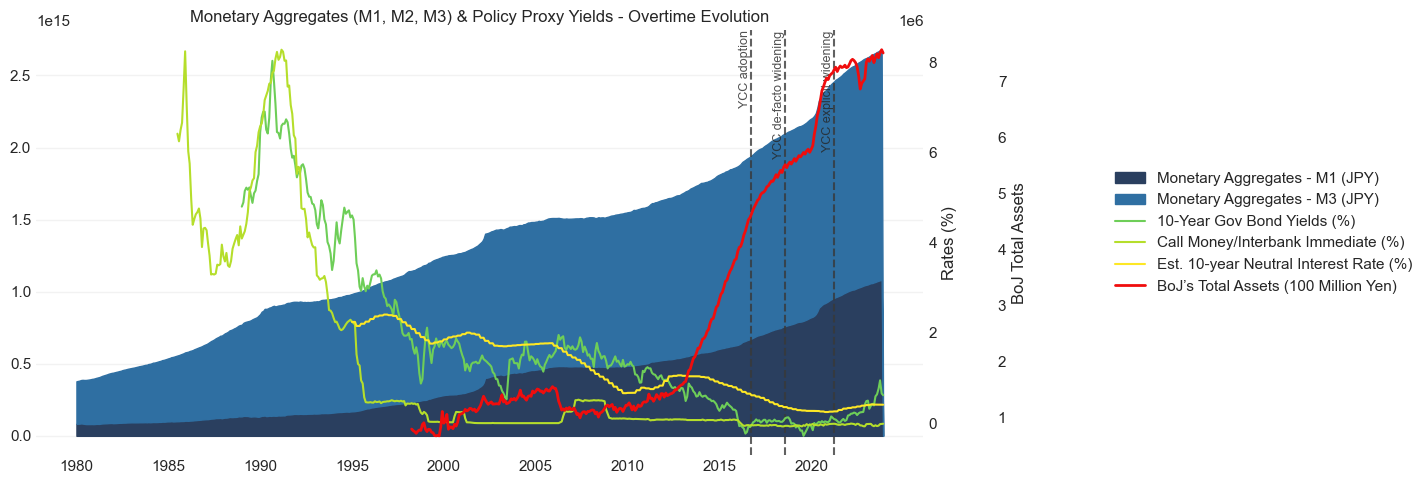

In [376]:
# Overtime Plotting - Restricted Monetary Aggregates & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics 
monetary_aggregates = ["Monetary Aggregates - M1 (JPY)",  
                       "Monetary Aggregates - M3 (JPY)"
                      ]
boj_ta = "BoJ’s Total Assets (100 Million Yen)"
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 1980) & (df.index.year < 2024)]
plot_cols = monetary_aggregates + [boj_ta] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Color Palette
monetary_colors = [
    "#2a3f5f",    
    "#2f6fa2"
]

# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Monetary Aggregates (Axis 1)
cum = np.zeros(len(df))
for i, col in enumerate(monetary_aggregates):
    s = df[col].to_numpy(dtype=float)
    s = np.nan_to_num(s, nan=0.0)
    ax1.fill_between(
        df.index,
        cum,
        cum + s,
        color=monetary_colors[i],
        alpha=1.0,
        label=col
    )
    cum += s
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Line Plotting for BoJ Total Assets (Axis 3)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(
    df.index,
    df[boj_ta],
    color="#f00d0d",
    lw=2,
    ls="-",
    label=boj_ta,
    zorder=6
)
ax3.set_ylabel("BoJ Total Assets")

# Cosmetics 
for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(
    h1 + h2 + h3,
    l1 + l2 + l3,
    loc="upper left",
    bbox_to_anchor=(1.2, 0.7),
    frameon=False,
)
ax1.set_title("Monetary Aggregates (M1, M2, M3) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()